# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

출처: 19기 DS 정은서님

In [84]:
import tensorflow as tf
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [85]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [ ]:
# 사용 X - 모델 만들 때 keras.layers.flatten 사용

x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

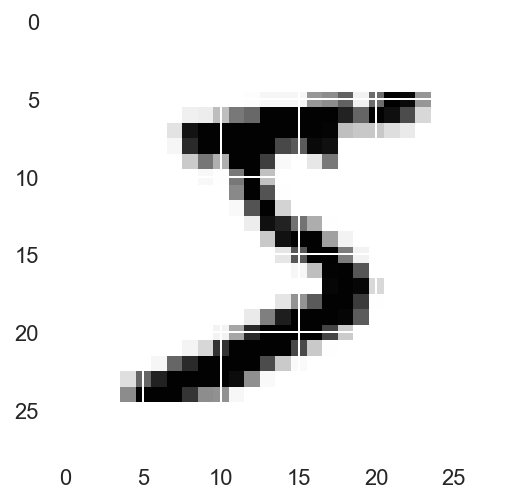

In [86]:
# Hint: x_train[0].reshape()
plt.imshow(x_train[0].reshape((28,28))).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [87]:
y_train.shape

(60000,)

In [88]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [ ]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [89]:
from tensorflow.keras import layers

In [90]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####

inputs = keras.Input(shape=(28,28))
flattened_input = keras.layers.Flatten()(inputs)
hidden1 = keras.layers.Dense(64,activation='relu')(flattened_input)
hidden2 = keras.layers.Dense(32,activation='relu')(hidden1)
outputs = keras.layers.Dense(16,activation='softmax')(hidden2) 
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = "adam",
              metrics = ["accuracy"])

내가 만든 모델을 확인해 봅시다.

In [91]:
model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 64)                50240     
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 16)                528       
                                                                 
Total params: 52,848
Trainable params: 52,848
Non-trainable params: 0
_________________________________________________________________


model을 자유롭게 train 해봅시다.  

In [92]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3138 - accuracy: 0.9096
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1440 - accuracy: 0.9575
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1037 - accuracy: 0.9684
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0812 - accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0690 - accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0573 - accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0486 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0422 - accuracy: 0.9861
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0361 - accuracy: 0.9886
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.032

95%이상의 성능을 가진 모델을 만들면 완성!

In [93]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 0s - loss: 0.0900 - accuracy: 0.9753 - 457ms/epoch - 1ms/step

Accuracy: 0.9753000140190125


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)